In [228]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
import json

In [229]:
 def game_event_to_panda_df(year):
        path = '/Users/macbook/Documents/Cours Automne_2021/IFT 6758 Data Science/milstone_data/'
        df = pd.read_json(path+str(year)+'02.json')        
        elementToRetrive = ['matchId',
                            'event',
                            'period',
                            'teamId',
                            'teamName',
                            'teamLink',
                            'teamTriCode',
                            'coordX',
                            'coordY',
                            'shooterName',
                            'goalieName',
                            'strength',
                            'shotSecondaryType']

        data = dict(zip(elementToRetrive, [[] for i in range(len(elementToRetrive))]))

        for game,ID in zip(df['liveData'],df['gamePk']):
            for play in game['plays']['allPlays']:
                if play['result']['event'] in ["Shot", "Goal"]:
                    data['matchId'].append(ID)
                    data['event'].append(play['result']['event'])
                    data['period'].append(play['about']['periodTime'])
                    data['teamId'].append(play['team']['id'])
                    data['teamName'].append(play['team']['name'])
                    data['teamLink'].append(play['team']['link'])
                    data['teamTriCode'].append(play['team']['triCode'])
                    data['coordX'].append(play['coordinates']['x'] if 'x' in play['coordinates'].keys() else np.nan)
                    data['coordY'].append(play['coordinates']['y'] if 'y' in play['coordinates'].keys() else np.nan)
                    if len(play['players']) == 2:
                        player0Type = play['players'][0]['playerType']
                        data['shooterName' if player0Type == "Shooter" else 'goalieName'].append(play['players'][0]['player']['fullName'])
                        data['goalieName' if player0Type == "Shooter" else 'shooterName'].append(play['players'][1]['player']['fullName'])
                    else:
                        data['shooterName'].append(play['players'][0]['player']['fullName'])
                        data['goalieName'].append(play['players'][len(play['players'])-1]['player']['fullName'])
                    if play['result']['event'] == "Goal":
                        data['strength'].append(play['result']['strength']['name'])
                    else:
                        data['strength'].append(None)
                    data['shotSecondaryType'].append(play['result']['secondaryType'] if 'secondaryType' in play['result'].keys() else np.nan)

        for column in data.items():
            column = pd.Series(column)

        return pd.DataFrame(data)

In [230]:
df = game_event_to_panda_df(2019)

In [231]:
print(df[df['event']=="Goal"]['coordX'].mean())
print(df[df['event']=="Goal"]['coordY'].mean())

-0.4434416365824308
0.053098676293622145


In [232]:
print(df[df['event']=="Shot"]['coordX'].mean())
print(df[df['event']=="Shot"]['coordY'].mean())

-0.5226107904480122
-0.08446104347544907


In [233]:
goal = df[df['event']=="Goal"]['shotSecondaryType'].value_counts().rename_axis('shottype').reset_index(name='counts')
shot = df[df['event']=="Shot"]['shotSecondaryType'].value_counts().rename_axis('shottype').reset_index(name='counts')

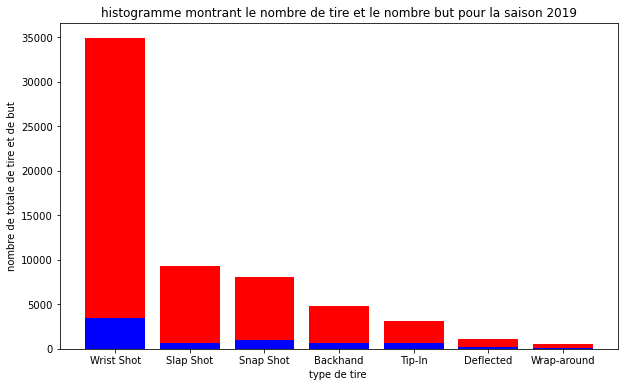

In [234]:
plt.bar(shot['shottype'], shot['counts'], label="nombre de tire", color='r')
plt.bar(goal['shottype'],goal['counts'], label="nombre de but", color='b')
plt.plot()
plt.xlabel("type de tire ")
plt.ylabel("nombre de totale de tire et de but")
plt.title("histogramme montrant le nombre de tire et le nombre but pour la saison 2019")
plt.show()